In [7]:
# Dependencies
import tweepy
import json
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [8]:
# Target Hashtags
target_tags = ("#Nintendo", "#PS4", "#X360", "#Wii", "#PS3", "#DS")
time_between_tweets = []

# Loop through each hashtag
for tag in target_tags:
    
    # Create array to record all date-times of tweets
    tweet_times = []

    # Get 100 tweets on targetted tag
    public_tweets = api.search(tag, rpp=100)
    print(tag)

    # Loop through all tweets
    for tweet in public_tweets["statuses"]:

        # Store all tweet times into the array
        tweet_times.append(tweet["created_at"])
    
    # Convert all tweet times into datetime objects
    tweet_time_objects = []

    # Add each datetime object into the array
    for x in range(len(tweet_times)):
        tweet_datetime = datetime.strptime(tweet_times[x], "%a %b %d %H:%M:%S %z %Y")
        tweet_time_objects.append(tweet_datetime)

    # Calculate the time between tweets
    time_in_between = []

    # Calculate the time in between each tweet
    for x in range(len(tweet_time_objects)-1):
        secs_apart = ((tweet_time_objects[x] - tweet_time_objects[x+1]).seconds) 
        time_in_between.append(secs_apart)

    # Seconds Between Tweets
    print(f"Avg. Seconds Between Tweets: {np.mean(time_in_between)}")
    print()

#Nintendo
Avg. Seconds Between Tweets: 21.571428571428573

#PS4
Avg. Seconds Between Tweets: 4.5

#X360
Avg. Seconds Between Tweets: 14169.42857142857

#Wii
Avg. Seconds Between Tweets: 727.75

#PS3
Avg. Seconds Between Tweets: 257.0

#DS
Avg. Seconds Between Tweets: 113.0



In [ ]:
#Overall Gaming Sentiment Bar Chart
colors = ['skyblue','green','red', 'blue', 'yellow', 'black']
time_chart = plt.bar(VG_df["User"],VG_df["Compound"] , color=colors, align ='center',width=1.0, edgecolor ='b')

#Other properties of the chart
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Video Games Sentiment based on twitter ({now})") 
plt.ylabel("Tweet Polarity")
plt.xlabel("Gaming Hastag")
plt.grid(False)
plt.show()

plt.savefig("output_data/sentiments_bar.png")
 

In [9]:
# Target Search Term
target_terms = ("#Nintendo", "#PS4", "#Xbone", "#Wii", "#PS3", "#DS")


# "Real Person" Filters
min_tweets = 5
max_tweets = 10000
max_followers = 2500
max_following = 2500
lang = "en"

# List to hold results
results_list = []

# Loop through all target users
for target in target_terms:

    # Variable for holding the oldest tweet
    oldest_tweet = None

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Loop through 5 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.search(
            target, count=100, result_type="recent", max_id=oldest_tweet)

        # Loop through all tweets
        for tweet in public_tweets["statuses"]:

            # Use filters to check if user meets conditions
            if (tweet["user"]["followers_count"] < max_followers
                and tweet["user"]["statuses_count"] > min_tweets
                and tweet["user"]["statuses_count"] < max_tweets
                and tweet["user"]["friends_count"] < max_following
                and tweet["user"]["lang"] == lang):

                # Run Vader Analysis on each tweet
                results = analyzer.polarity_scores(tweet["text"])
                compound = results["compound"]
                pos = results["pos"]
                neu = results["neu"]
                neg = results["neg"]

                # Add each value to the appropriate list
                compound_list.append(compound)
                positive_list.append(pos)
                negative_list.append(neg)
                neutral_list.append(neu)
                
            # Set the new oldest_tweet value
            oldest_tweet = tweet["id"] - 1

    # Store the Average Sentiments
    sentiment = {
        "User": target,
        "Compound": np.mean(compound_list),
        "Positive": np.mean(positive_list),
        "Neutral": np.mean(negative_list),
        "Negative": np.mean(neutral_list),
        "Tweet Count": len(compound_list)
    }

    # Print the Sentiments
    print(sentiment)
    print()
    
    # Append  results to 'results_list'
    results_list.append(sentiment)

{'User': '#Nintendo', 'Compound': 0.21393659793814435, 'Positive': 0.09106701030927836, 'Neutral': 0.01147938144329897, 'Negative': 0.8974329896907215, 'Tweet Count': 194}

{'User': '#PS4', 'Compound': 0.28551322751322755, 'Positive': 0.09795767195767198, 'Neutral': 0.011925925925925927, 'Negative': 0.890116402116402, 'Tweet Count': 189}

{'User': '#Xbone', 'Compound': 0.17726565656565652, 'Positive': 0.10882828282828284, 'Neutral': 0.03213131313131313, 'Negative': 0.859050505050505, 'Tweet Count': 99}

{'User': '#Wii', 'Compound': 0.153796875, 'Positive': 0.07578125, 'Neutral': 0.0197125, 'Negative': 0.9045125, 'Tweet Count': 160}

{'User': '#PS3', 'Compound': 0.09411232876712329, 'Positive': 0.06623287671232876, 'Neutral': 0.03315068493150685, 'Negative': 0.9006301369863013, 'Tweet Count': 73}

{'User': '#DS', 'Compound': 0.28052109375000006, 'Positive': 0.07541015625000003, 'Neutral': 0.001453125, 'Negative': 0.9231328125, 'Tweet Count': 256}



In [10]:
VG_df = pd.DataFrame(results_list).round(3)
VG_df

,Compound,Negative,Neutral,Positive,Tweet Count,User
0,0.214,0.897,0.011,0.091,194,#Nintendo
1,0.286,0.890,0.012,0.098,189,#PS4
2,0.177,0.859,0.032,0.109,99,#Xbone
3,0.154,0.905,0.020,0.076,160,#Wii
4,0.094,0.901,0.033,0.066,73,#PS3
5,0.281,0.923,0.001,0.075,256,#DS


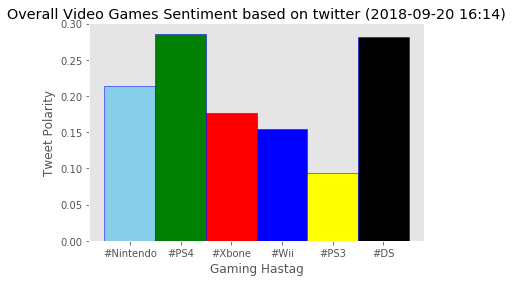

<Figure size 432x288 with 0 Axes>

In [20]:
#Overall Gaming Sentiment Bar Chart
colors = ['skyblue','green','red', 'blue', 'yellow', 'black']
sentiment_chart = plt.bar(VG_df["User"],VG_df["Compound"] , color=colors, align ='center',width=1.0, edgecolor ='b')

#Other properties of the chart
now = datetime.now()
now = now.strftime("%Y-%m-%d %H:%M")
plt.title(f"Overall Video Games Sentiment based on twitter ({now})") 
plt.ylabel("Tweet Polarity")
plt.xlabel("Gaming Hastag")
plt.grid(False)
plt.show()

plt.savefig("output_data/sentiments_bar.png")
 